# References
1. https://www.fast.ai

# EmbeddingNN

### Imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# For modeling
from fastai.tabular import *
from fastai.collab import *
# For visualization
import seaborn as sns
from matplotlib import pyplot as plt
# For working with data
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import resample
from math import sqrt

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### Data Preprocessing


1.   Read Data and create TF-IDF Vectors
2.   Split to Train and Test Data
3.   Perform Sampling on Train Data





In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/final_with_bins.csv')
df = df.groupby('product_id').filter(lambda x: len(x) >= 5)
df = df.groupby('user_id').filter(lambda x: len(x) >= 15)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.8
train = df[msk]
test = df[~msk]


train.to_csv('/content/drive/My Drive/Colab Notebooks/train_with_9_bins_V3.csv', index=False)
test.to_csv('/content/drive/My Drive/Colab Notebooks/test_with_9_bins_V3.csv', index=False)

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_with_9_bins_V3.csv')
df_majority = data[data.bin==1.0]
df_majority_downsampled = resample(df_majority, 
                                replace=False,    # sample without replacement
                                n_samples=38858,     # to match minority class
                                random_state=123)
df_minority1 = data[data.bin==1.5]
df_minority1 = resample(df_minority1, 
                                 replace=True,    # sample without replacement
                                 n_samples=200000,     # to match minority class
                                 random_state=123)
df_minority2 = data[data.bin==2.0]
df_minority2 = resample(df_minority2, 
                                 replace=True,    # sample without replacement
                                 n_samples=195000,     # to match minority class
                                 random_state=123)
df_minority3 = data[data.bin==2.5]
df_minority3 = resample(df_minority3, 
                                 replace=True,    # sample without replacement
                                 n_samples=190000,     # to match minority class
                                 random_state=123)
df_minority4 = data[data.bin==3.0]
df_minority4 = resample(df_minority4, 
                                 replace=True,    # sample without replacement
                                 n_samples=185000,     # to match minority class
                                 random_state=123)
df_minority5 = data[data.bin==3.5]
df_minority5 = resample(df_minority5, 
                                 replace=True,    # sample without replacement
                                 n_samples=180000,     # to match minority class
                                 random_state=123)
df_minority6 = data[data.bin==4.0]
df_minority6 = resample(df_minority6, 
                                 replace=True,    # sample without replacement
                                 n_samples=175000,     # to match minority class
                                 random_state=123)
df_minority7 = data[data.bin==4.5]
df_minority7 = resample(df_minority7, 
                                 replace=True,    # sample without replacement
                                 n_samples=170000,     # to match minority class
                                 random_state=123)
df_minority8 = data[data.bin==5.0]
df_minority8 = resample(df_minority8, 
                                 replace=True,    # sample without replacement
                                 n_samples=220000,     # to match minority class
                                 random_state=123)

data = pd.concat([df_majority, df_minority1, df_minority2, df_minority3, df_minority4, df_minority5, df_minority6, df_minority7, df_minority8])

data_reduced = data[['product_id', 'user_id', 'tags', 'bin']].copy()
#notPrice = ['Free To Play', 'nan', 'Free', 'Free to Play', 'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo',
 #'Free Mod', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free Movie', 'Free to Use', 'Third-party', '0.00 to Use']
#for i in notPrice:
 # data_reduced['price'] = data_reduced['price'].str.replace(i, '0.00')
#print(data_reduced['price'].unique())
#data_reduced = pd.concat([data_reduced, user_data], axis=0)
data_reduced.head()
data_reduced.to_csv('/content/drive/My Drive/Colab Notebooks/train_with_9_bins_V3_balanced.csv')

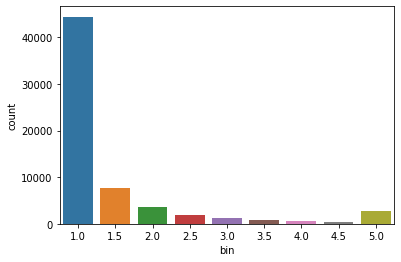

In [0]:
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_with_9_bins_V3.csv')
test_data = test_data[['product_id', 'user_id', 'tags', 'bin']].copy()
#notPrice = ['Free To Play', 'nan', 'Free', 'Free to Play', 'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo',
 #'Free Mod', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free Movie', 'Free to Use', 'Third-party', '0.00 to Use']
#for i in notPrice:
#  test_data['price'] = test_data['price'].str.replace(i, '0.00')
sns.countplot(test_data['bin'])

In [0]:
len(data_reduced)

1692190

In [0]:
data_reduced['bin'].value_counts()

5.0    220000
1.5    200000
2.0    195000
2.5    190000
3.0    185000
3.5    180000
1.0    177190
4.0    175000
4.5    170000
Name: bin, dtype: int64

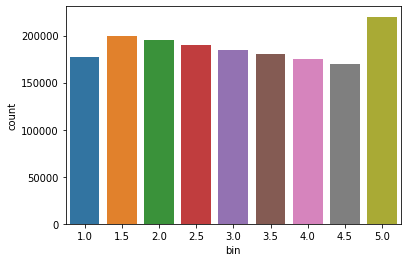

In [0]:
sns.countplot(data_reduced['bin'])

In [0]:
# load balanced data in case preprocessing was already done
data_reduced = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_with_9_bins_V3_balanced.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_with_9_bins_V3.csv')

In [0]:
# TF-IDF Vector Creation for Test
print('start TF-IDF')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(test_data['tags'].values.astype('U'))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=test_data.index.tolist())
tfidf_df['tags_tfidf'] = '[' + tfidf_df[tfidf_df.columns[1:]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
) + ']'
tfidf_df['tags_tfidf'] = tfidf_df['tags_tfidf'].apply(lambda x: np.array(x))
df = pd.concat([test_data, tfidf_df], axis=1)

start TF-IDF


In [0]:
# TF-IDF Vector Creation for Training
print('start TF-IDF')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data_reduced['tags'].values.astype('U'))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=data_reduced.index.tolist())
tfidf_df['tags_tfidf'] = '[' + tfidf_df[tfidf_df.columns[1:]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
) + ']'
tfidf_df['tags_tfidf'] = tfidf_df['tags_tfidf'].apply(lambda x: np.array(x))
df = pd.concat([data_reduced, tfidf_df], axis=1)

### Model Training (8 x 8 Layers)


1.   Train and Save the Model
2.   Apply the Model to Test Data
3.   Append Predictions to Test Data



In [0]:
data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, test=test_data, user_name='user_id', item_name='product_id', rating_name='bin')
data_collab.show_batch()
learn = collab_learner(data_collab, use_nn=True, emb_szs={'user_id': 40, 'product_id': 40}, layers=[8, 8], emb_drop=0.2, y_range=(1, 5))

user_id,product_id,target
76561198060622168,299030.0,1.5
76561198116866397,339570.0,1.5
76561197973236751,451020.0,2.5
76561198149337330,346900.0,2.5
76561198074169975,448510.0,1.0


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


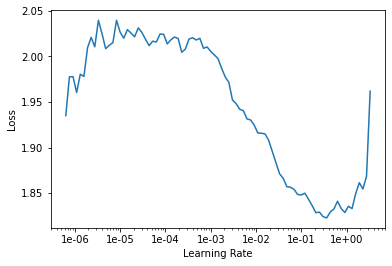

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,time
0,0.864764,0.768024,08:53
1,0.731216,0.647883,11:11
2,0.639365,0.569789,11:09
3,0.562395,0.489700,11:25
4,0.536802,0.447053,11:24
5,0.510914,0.410172,11:36
6,0.503558,0.390328,10:59
7,0.446975,0.355626,10:47
8,0.435932,0.357438,10:33
9,0.430312,0.337572,10:27


In [0]:
learn.save("/content/drive/My Drive/Colab Notebooks/trained_model_NN_9_bins_8x8")

In [0]:
data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, test=test_data, user_name='user_id', item_name='product_id', rating_name='bin')
learn = collab_learner(data_collab, use_nn=True, emb_szs={'user_id': 40, 'product_id':40}, layers=[8, 8], emb_drop=0.2, y_range=(1, 5))
learn_loaded = learn.load(Path('/content/drive/My Drive/Colab Notebooks/trained_model_NN_9_bins_8x8'))
preds, y = learn_loaded.get_preds(DatasetType.Test)

In [0]:
predsArray = preds.numpy()
test_data['preds'] = predsArray
test_data['bias'] = test_data['preds'].sub(test_data['bin'], axis = 0)
test_data.head

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method NDFrame.head of                  user_id  product_id  bin     preds      bias
0      76561198065664667    643980.0  1.0  1.293604  0.293604
1      76561198073092169    643980.0  1.0  1.178442  0.178442
2      76561198074855431    643980.0  1.0  1.250982  0.250982
3      76561198042407753    282010.0  1.0  1.071990  0.071990
4      76561198044140048    282010.0  1.0  1.121273  0.121273
...                  ...         ...  ...       ...       ...
63578  76561198076914102        80.0  2.0  1.715656 -0.284344
63579  76561198067155590        80.0  1.0  1.387497  0.387497
63580  76561198048381919        80.0  3.0  2.163423 -0.836577
63581  76561198110714834        80.0  1.0  1.674760  0.674760
63582  76561198081828774        80.0  1.0  3.410381  2.410381

[63583 rows x 5 columns]>

### Evaluation (8 x 8 Layers)

In [0]:
from collections import defaultdict
from math import log2


def mean_ap(predictions, verbose=True, k=10):
    predictions_u = defaultdict(list)
    true_u = defaultdict(list)

    # print(predictions)

    for index, (u0, i0, r0, est) in predictions.iterrows():
       true_u[u0].append((r0, i0))
       predictions_u[u0].append((est, i0))
        
    aps = list()

    for u0 in predictions_u:
        if len(predictions_u[u0]) >= k:
            p = sorted(predictions_u[u0], reverse=True)[:k]
            p = [v for _,v in p]
            t = sorted(true_u[u0], reverse=True)[:k]
            t = [v for _,v in t]

            ap = 0
            correct = 0
            for i in range(len(p)):
                if p[i] in t:
                    correct += 1
                    ap += correct / (i+1)

            ap /= len(t)
            aps.append(ap)
            
    map_ = np.array(aps).mean()
    
    if verbose:
        print('MAP: {0:1.4f}'.format(map_))
    
    return map_


def ndcg(predictions, verbose=True, k=10):
    predictions_u = defaultdict(list)
    true_u = defaultdict(list)

    for index,(u0, i0, r0, est) in predictions.iterrows():
        true_u[u0].append((r0, i0))
        predictions_u[u0].append((est, i0))

    idcg = np.arange(k+1)
    idcg[0:2] = 2
    idcg = 1 / np.log2(idcg)
    idcg = np.cumsum(idcg)

    ndcgs = list()

    for u0 in predictions_u:
        if len(predictions_u[u0]) >= k:
            p = sorted(predictions_u[u0], reverse=True)[:k]
            p = [v for _,v in p]
            t = sorted(true_u[u0], reverse=True)[:k]
            t = [v for _,v in t]

            dcg = 0
            correct = 0
            for i in range(len(p)):
                if p[i] in t:
                    correct += 1
                    if i == 0:
                        dcg += 1
                    else:
                        dcg += 1/log2(i+1)

            ndcg = dcg / idcg[correct]
            ndcgs.append(ndcg)

    ndcg_ = np.array(ndcgs).mean()
    
    if verbose:
        print('NDCG: {0:1.4f}'.format(ndcg_))
        
    return ndcg_
    
test_data = test_data[['user_id', 'product_id', 'bin', 'preds']]
mean_ap(test_data)
ndcg(test_data)

MAP: 0.6718
NDCG: 0.7339


0.7338541467630062

In [0]:
mae = mean_absolute_error(test_data['bin'], test_data['preds'])
mse = mean_squared_error(test_data['bin'], test_data['preds'])
rmse = sqrt(mean_squared_error(test_data['bin'], test_data['preds']))

print('MAE: ' + str(mae))
print('RMSE: ' + str(rmse))

MAE: 0.7471147363199344
RMSE: 1.0903658393641122


### Model Training (16 x 16 Layers)


1.   Train and Save the Model
2.   Apply the Model to Test Data
3.   Append Predictions to Test Data



In [0]:
data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, test=test_data, user_name='user_id', item_name='product_id', rating_name='bin')
data_collab.show_batch()
learn = collab_learner(data_collab, use_nn=True, emb_szs={'user_id': 40, 'product_id': 40}, layers=[16, 16], emb_drop=0.2, y_range=(1, 5))

user_id,product_id,target
76561198048878054,221100.0,5.0
76561198031278560,203770.0,5.0
76561198056842200,546930.0,1.0
76561197983496416,225840.0,1.0
76561197967864400,107410.0,2.5


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


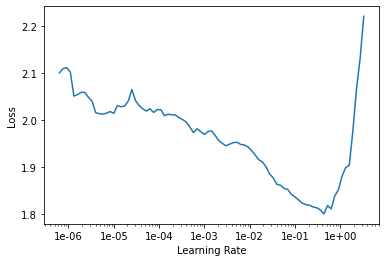

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,time
0,0.704877,0.627236,05:07
1,0.658461,0.545547,05:09
2,0.648961,0.527519,05:12
3,0.583522,0.514881,05:12
4,0.560451,0.461640,05:13
5,0.510919,0.413582,05:11
6,0.459398,0.340322,05:12
7,0.347287,0.245228,05:13
8,0.299516,0.185120,05:10
9,0.267393,0.177696,05:11


In [0]:
learn.save("/content/drive/My Drive/Colab Notebooks/trained_model_NN_9_bins_16x16")

In [0]:
data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, test=test_data, user_name='user_id', item_name='product_id', rating_name='bin')
learn = collab_learner(data_collab, use_nn=True, emb_szs={'user_id': 40, 'product_id':40}, layers=[16, 16], emb_drop=0.2, y_range=(1, 5))
learn_loaded = learn.load(Path('/content/drive/My Drive/Colab Notebooks/trained_model_NN_9_bins_16x16'))
preds, y = learn_loaded.get_preds(DatasetType.Test)

In [0]:
predsArray = preds.numpy()
test_data['preds'] = predsArray

test_data['bias'] = test_data['preds'].sub(test_data['bin'], axis = 0)
test_data.head

<bound method NDFrame.head of                  publisher  ...      bias
0             Poolians.com  ...  0.186455
1      Stainless Games Ltd  ...  0.166529
2      Stainless Games Ltd  ...  0.380450
3      Stainless Games Ltd  ...  0.730138
4                    Valve  ...  0.660417
...                    ...  ...       ...
63349                Valve  ...  1.050282
63350                Valve  ...  0.752073
63351                Valve  ...  0.495347
63352                Valve  ...  0.723087
63353                Valve  ...  0.177611

[63354 rows x 22 columns]>

### Evaluation (16 x 16 Layers)

In [0]:
from collections import defaultdict
from math import log2


def mean_ap(predictions, verbose=True, k=10):
    predictions_u = defaultdict(list)
    true_u = defaultdict(list)

    # print(predictions)

    for index, (u0, i0, r0, est) in predictions.iterrows():
       true_u[u0].append((r0, i0))
       predictions_u[u0].append((est, i0))
        
    aps = list()

    for u0 in predictions_u:
        if len(predictions_u[u0]) >= k:
            p = sorted(predictions_u[u0], reverse=True)[:k]
            p = [v for _,v in p]
            t = sorted(true_u[u0], reverse=True)[:k]
            t = [v for _,v in t]

            ap = 0
            correct = 0
            for i in range(len(p)):
                if p[i] in t:
                    correct += 1
                    ap += correct / (i+1)

            ap /= len(t)
            aps.append(ap)
            
    map_ = np.array(aps).mean()
    
    if verbose:
        print('MAP: {0:1.4f}'.format(map_))
    
    return map_


def ndcg(predictions, verbose=True, k=10):
    predictions_u = defaultdict(list)
    true_u = defaultdict(list)

    for index,(u0, i0, r0, est) in predictions.iterrows():
        true_u[u0].append((r0, i0))
        predictions_u[u0].append((est, i0))

    idcg = np.arange(k+1)
    idcg[0:2] = 2
    idcg = 1 / np.log2(idcg)
    idcg = np.cumsum(idcg)

    ndcgs = list()

    for u0 in predictions_u:
        if len(predictions_u[u0]) >= k:
            p = sorted(predictions_u[u0], reverse=True)[:k]
            p = [v for _,v in p]
            t = sorted(true_u[u0], reverse=True)[:k]
            t = [v for _,v in t]

            dcg = 0
            correct = 0
            for i in range(len(p)):
                if p[i] in t:
                    correct += 1
                    if i == 0:
                        dcg += 1
                    else:
                        dcg += 1/log2(i+1)

            ndcg = dcg / idcg[correct]
            ndcgs.append(ndcg)

    ndcg_ = np.array(ndcgs).mean()
    
    if verbose:
        print('NDCG: {0:1.4f}'.format(ndcg_))
        
    return ndcg_

test_data = test_data[['user_id', 'product_id', 'bin', 'preds']]
mean_ap(test_data)
ndcg(test_data)

MAP: 0.6731
NDCG: 0.7264


0.7263506195590698

In [0]:
mse = mean_squared_error(test_data['bin'], test_data['preds'])
mae = mean_absolute_error(test_data['bin'], test_data['preds'])
rmse = sqrt(mean_squared_error(test_data['bin'], test_data['preds']))

print('MAE: ' + str(mae))
print('RMSE: ' + str(rmse))

MAE: 0.7049932499822577
RMSE: 1.0610455002051173


### Model Training (32 x 32 Layers)


1.   Train and Save the Model
2.   Apply the Model to Test Data
3.   Append Predictions to Test Data



In [0]:
data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, test=test_data, user_name='user_id', item_name='product_id', rating_name='bin')
data_collab.show_batch()
learn = collab_learner(data_collab, use_nn=True, emb_szs={'user_id': 40, 'product_id': 40}, layers=[32, 32], emb_drop=0.2, y_range=(1, 5))

user_id,product_id,target
76561198174053214,351710.0,5.0
76561197965285141,244160.0,2.0
76561198147276307,236110.0,2.5
76561198279803741,209000.0,3.5
76561198013132245,211820.0,2.0


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


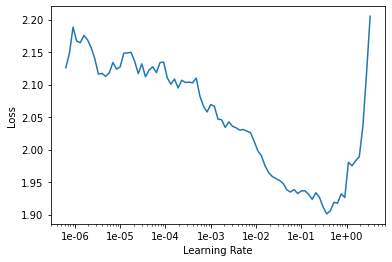

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,time
0,0.681181,0.562229,05:18
1,0.530296,0.407789,05:17
2,0.437701,0.322353,05:15
3,0.381620,0.273482,05:15
4,0.367762,0.245998,05:14
5,0.330163,0.218984,05:18
6,0.319494,0.192638,05:13
7,0.285112,0.166563,05:15
8,0.249763,0.153618,05:13
9,0.251961,0.150531,05:16


In [0]:
learn.save("/content/drive/My Drive/Colab Notebooks/trained_model_NN_9_bins_32x32")

In [0]:
data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, test=test_data, user_name='user_id', item_name='product_id', rating_name='bin')
learn = collab_learner(data_collab, use_nn=True, emb_szs={'user_id': 40, 'product_id':40}, layers=[32, 32], emb_drop=0.2, y_range=(1, 5))
learn_loaded = learn.load(Path('/content/drive/My Drive/Colab Notebooks/trained_model_NN_9_bins_32x32'))
preds, y = learn_loaded.get_preds(DatasetType.Test)

In [0]:
predsArray = preds.numpy()
test_data['preds'] = predsArray

test_data['bias'] = test_data['preds'].sub(test_data['bin'], axis = 0)
test_data.head

<bound method NDFrame.head of                  user_id  product_id  bin     preds      bias
0      76561198200072527    670290.0  1.0  1.263351  0.263351
1      76561198042407753    282010.0  1.0  1.059877  0.059877
2      76561198037347067    282010.0  1.0  1.276392  0.276392
3      76561198040317132    282010.0  1.0  1.205206  0.205206
4      76561198181698219        70.0  1.0  1.402666  0.402666
...                  ...         ...  ...       ...       ...
63349  76561197989607632        80.0  1.0  3.744488  2.744488
63350  76561198046741114        80.0  1.5  1.605696  0.105696
63351  76561198023640043        80.0  1.0  2.728013  1.728013
63352  76561198051317669        80.0  1.5  1.967323  0.467323
63353  76561198040188061        80.0  1.5  3.404195  1.904195

[63354 rows x 5 columns]>

### Evaluation (32 x 32 Layers)

In [0]:
from collections import defaultdict
from math import log2


def mean_ap(predictions, verbose=True, k=10):
    predictions_u = defaultdict(list)
    true_u = defaultdict(list)

    # print(predictions)

    for index, (u0, i0, r0, est) in predictions.iterrows():
       true_u[u0].append((r0, i0))
       predictions_u[u0].append((est, i0))
        
    aps = list()

    for u0 in predictions_u:
        if len(predictions_u[u0]) >= k:
            p = sorted(predictions_u[u0], reverse=True)[:k]
            p = [v for _,v in p]
            t = sorted(true_u[u0], reverse=True)[:k]
            t = [v for _,v in t]

            ap = 0
            correct = 0
            for i in range(len(p)):
                if p[i] in t:
                    correct += 1
                    ap += correct / (i+1)

            ap /= len(t)
            aps.append(ap)
            
    map_ = np.array(aps).mean()
    
    if verbose:
        print('MAP: {0:1.4f}'.format(map_))
    
    return map_


def ndcg(predictions, verbose=True, k=10):
    predictions_u = defaultdict(list)
    true_u = defaultdict(list)

    for index,(u0, i0, r0, est) in predictions.iterrows():
        true_u[u0].append((r0, i0))
        predictions_u[u0].append((est, i0))

    idcg = np.arange(k+1)
    idcg[0:2] = 2
    idcg = 1 / np.log2(idcg)
    idcg = np.cumsum(idcg)

    ndcgs = list()

    for u0 in predictions_u:
        if len(predictions_u[u0]) >= k:
            p = sorted(predictions_u[u0], reverse=True)[:k]
            p = [v for _,v in p]
            t = sorted(true_u[u0], reverse=True)[:k]
            t = [v for _,v in t]

            dcg = 0
            correct = 0
            for i in range(len(p)):
                if p[i] in t:
                    correct += 1
                    if i == 0:
                        dcg += 1
                    else:
                        dcg += 1/log2(i+1)

            ndcg = dcg / idcg[correct]
            ndcgs.append(ndcg)

    ndcg_ = np.array(ndcgs).mean()
    
    if verbose:
        print('NDCG: {0:1.4f}'.format(ndcg_))
        
    return ndcg_

test_data = test_data[['user_id', 'product_id', 'bin', 'preds']]
mean_ap(test_data)
ndcg(test_data)

MAP: 0.6724
NDCG: 0.7277


0.7276883960489277

In [0]:
mae = mean_absolute_error(test_data['bin'], test_data['preds'])
mse = mean_squared_error(test_data['bin'], test_data['preds'])
rmse = sqrt(mean_squared_error(test_data['bin'], test_data['preds']))

print('MAE: ' + str(mae))
print('RMSE: ' + str(rmse))

MAE: 0.6541298078791445
RMSE: 1.0231680439022348


# EmbeddingDotBias

### Imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# For modeling
from fastai.tabular import *
from fastai.collab import *
# For visualization
import seaborn as sns
from matplotlib import pyplot as plt
# For working with data
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.utils import resample
from math import sqrt

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### Data Preprocessing


1.   Read Data and create TF-IDF Vectors
2.   Split to Train and Test Data
3.   Perform Sampling on Train Data





In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/final_with_bins.csv')
df = df.groupby('product_id').filter(lambda x: len(x) >= 5)
df = df.groupby('user_id').filter(lambda x: len(x) >= 15)

print('start TF-IDF')
#TF-IDF Vectorizing
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['tags'].values.astype('U'))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=df.index.tolist())
tfidf_df['tags_tfidf'] = '[' + tfidf_df[tfidf_df.columns[1:]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1
) + ']'
tfidf_df['tags_tfidf'] = tfidf_df['tags_tfidf'].apply(lambda x: np.array(x))
df = pd.concat([df, tfidf_df], axis=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


start TF-IDF


In [0]:
df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.8
train = df[msk]
test = df[~msk]


train.to_csv('/content/drive/My Drive/Colab Notebooks/train_with_9_bins_V3.csv', index=False)
test.to_csv('/content/drive/My Drive/Colab Notebooks/test_with_9_bins_V3.csv', index=False)

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_with_9_bins_V3.csv')
df_majority = data[data.bin==1.0]
df_majority_downsampled = resample(df_majority, 
                                replace=False,    # sample without replacement
                                n_samples=38858,     # to match minority class
                                random_state=123)
df_minority1 = data[data.bin==1.5]
df_minority1 = resample(df_minority1, 
                                 replace=True,    # sample without replacement
                                 n_samples=200000,     # to match minority class
                                 random_state=123)
df_minority2 = data[data.bin==2.0]
df_minority2 = resample(df_minority2, 
                                 replace=True,    # sample without replacement
                                 n_samples=195000,     # to match minority class
                                 random_state=123)
df_minority3 = data[data.bin==2.5]
df_minority3 = resample(df_minority3, 
                                 replace=True,    # sample without replacement
                                 n_samples=190000,     # to match minority class
                                 random_state=123)
df_minority4 = data[data.bin==3.0]
df_minority4 = resample(df_minority4, 
                                 replace=True,    # sample without replacement
                                 n_samples=185000,     # to match minority class
                                 random_state=123)
df_minority5 = data[data.bin==3.5]
df_minority5 = resample(df_minority5, 
                                 replace=True,    # sample without replacement
                                 n_samples=180000,     # to match minority class
                                 random_state=123)
df_minority6 = data[data.bin==4.0]
df_minority6 = resample(df_minority6, 
                                 replace=True,    # sample without replacement
                                 n_samples=175000,     # to match minority class
                                 random_state=123)
df_minority7 = data[data.bin==4.5]
df_minority7 = resample(df_minority7, 
                                 replace=True,    # sample without replacement
                                 n_samples=170000,     # to match minority class
                                 random_state=123)
df_minority8 = data[data.bin==5.0]
df_minority8 = resample(df_minority8, 
                                 replace=True,    # sample without replacement
                                 n_samples=220000,     # to match minority class
                                 random_state=123)

data = pd.concat([df_majority, df_minority1, df_minority2, df_minority3, df_minority4, df_minority5, df_minority6, df_minority7, df_minority8])

data_reduced = data[['product_id', 'user_id', 'tags_tfidf', 'bin']].copy()
#notPrice = ['Free To Play', 'nan', 'Free', 'Free to Play', 'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo',
 #'Free Mod', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free Movie', 'Free to Use', 'Third-party', '0.00 to Use']
#for i in notPrice:
 # data_reduced['price'] = data_reduced['price'].str.replace(i, '0.00')
#print(data_reduced['price'].unique())
#data_reduced = pd.concat([data_reduced, user_data], axis=0)
data_reduced.head()
data_reduced.to_csv('/content/drive/My Drive/Colab Notebooks/train_with_9_bins_V3_balanced.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


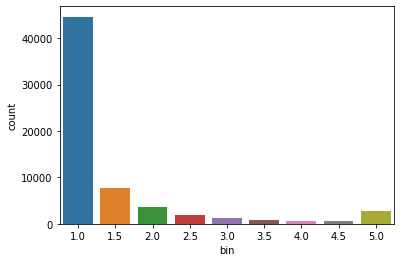

In [0]:
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_with_9_bins_V3.csv')
test_data = test_data[['product_id', 'user_id','bin']].copy()
#notPrice = ['Free To Play', 'nan', 'Free', 'Free to Play', 'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo',
 #'Free Mod', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free Movie', 'Free to Use', 'Third-party', '0.00 to Use']
#for i in notPrice:
#  test_data['price'] = test_data['price'].str.replace(i, '0.00')
sns.countplot(test_data['bin'])

In [0]:
len(data_reduced)

1691965

In [0]:
data_reduced['bin'].value_counts()

5.0    220000
1.5    200000
2.0    195000
2.5    190000
3.0    185000
3.5    180000
1.0    176965
4.0    175000
4.5    170000
Name: bin, dtype: int64

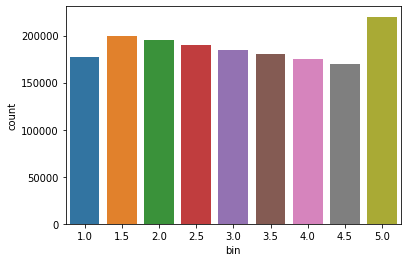

In [0]:
sns.countplot(data_reduced['bin'])

In [0]:
# load balanced data in case preprocessing was already done
data_reduced = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_with_9_bins_V3_balanced.csv')

### Model Training


1.   Train and Save the Model
2.   Apply the Model to Test Data
3.   Append Predictions to Test Data



In [0]:
#data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, bs=512, val_bs=512, test=test_data, user_name='user_id', item_name='product_id', rating_name='bin')
data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, test=test_data, user_name='user_id', item_name='product_id', rating_name='bin')
data_collab.show_batch()
learn = collab_learner(data_collab, n_factors=40, y_range=(0, 5), wd=1e-2)

user_id,product_id,target
76561198004811351,363440.0,3.0
76561197961326179,294860.0,1.0
76561198254721507,239140.0,4.5
76561198015237777,239120.0,3.5
76561198074777881,290080.0,3.0


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


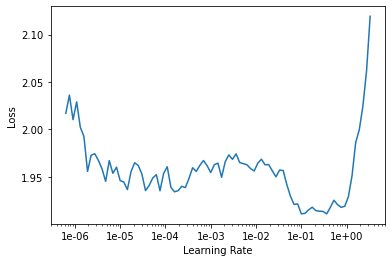

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,time
0,0.207654,0.220263,07:22
1,0.332514,0.328273,09:03
2,0.432609,0.452202,09:31
3,0.406714,0.424926,09:12
4,0.342773,0.352572,09:08
5,0.242350,0.257381,09:03
6,0.146490,0.167864,08:54
7,0.067160,0.112852,08:53
8,0.030805,0.093357,09:28
9,0.019949,0.092227,09:22


In [0]:
learn.save("/content/drive/My Drive/Colab Notebooks/trained_model_DB_9_bins")

In [0]:
#data_collab = CollabDataBunch.from_df(data_reduced, test=test_data, seed=42, valid_pct=0.2, bs=512, val_bs=512, user_name='user_id', item_name='product_id', rating_name='bin')
data_collab = CollabDataBunch.from_df(data_reduced, seed=42, valid_pct=0.2, test=test_data, user_name='user_id', item_name='product_id', rating_name='bin')
learn = collab_learner(data_collab, n_factors=40, y_range=(0, 5), wd=1e-2)
learn_loaded = learn.load(Path('/content/drive/My Drive/Colab Notebooks/trained_model_DB_9_bins'))
preds, y = learn_loaded.get_preds(DatasetType.Test)

In [0]:
predsArray = preds.numpy()
test_data['preds'] = predsArray

test_data['bias'] = test_data['preds'].sub(test_data['bin'], axis = 0)
test_data.head

<bound method NDFrame.head of        product_id            user_id  ...     preds      bias
0        643980.0  76561198065664667  ...  2.433948  1.433948
1        643980.0  76561198073092169  ...  1.450204  0.450204
2        643980.0  76561198074855431  ...  2.524666  1.524666
3        282010.0  76561198042407753  ...  1.631705  0.631705
4        282010.0  76561198044140048  ...  1.053119  0.053119
...           ...                ...  ...       ...       ...
63578        80.0  76561198076914102  ...  1.403638 -0.596362
63579        80.0  76561198067155590  ...  1.445082  0.445082
63580        80.0  76561198048381919  ...  1.804880 -1.195120
63581        80.0  76561198110714834  ...  0.833475 -0.166525
63582        80.0  76561198081828774  ...  0.961932 -0.038068

[63583 rows x 6 columns]>

### Evaluation

In [0]:
from collections import defaultdict
from math import log2


def mean_ap(predictions, verbose=True, k=10):
    predictions_u = defaultdict(list)
    true_u = defaultdict(list)

    # print(predictions)

    for index, (u0, i0, r0, est) in predictions.iterrows():
       true_u[u0].append((r0, i0))
       predictions_u[u0].append((est, i0))
        
    aps = list()

    for u0 in predictions_u:
        if len(predictions_u[u0]) >= k:
            p = sorted(predictions_u[u0], reverse=True)[:k]
            p = [v for _,v in p]
            t = sorted(true_u[u0], reverse=True)[:k]
            t = [v for _,v in t]

            ap = 0
            correct = 0
            for i in range(len(p)):
                if p[i] in t:
                    correct += 1
                    ap += correct / (i+1)

            ap /= len(t)
            aps.append(ap)
            
    map_ = np.array(aps).mean()
    
    if verbose:
        print('MAP: {0:1.4f}'.format(map_))
    
    return map_


def ndcg(predictions, verbose=True, k=10):
    predictions_u = defaultdict(list)
    true_u = defaultdict(list)

    for index,(u0, i0, r0, est) in predictions.iterrows():
        true_u[u0].append((r0, i0))
        predictions_u[u0].append((est, i0))

    idcg = np.arange(k+1)
    idcg[0:2] = 2
    idcg = 1 / np.log2(idcg)
    idcg = np.cumsum(idcg)

    ndcgs = list()

    for u0 in predictions_u:
        if len(predictions_u[u0]) >= k:
            p = sorted(predictions_u[u0], reverse=True)[:k]
            p = [v for _,v in p]
            t = sorted(true_u[u0], reverse=True)[:k]
            t = [v for _,v in t]

            dcg = 0
            correct = 0
            for i in range(len(p)):
                if p[i] in t:
                    correct += 1
                    if i == 0:
                        dcg += 1
                    else:
                        dcg += 1/log2(i+1)

            ndcg = dcg / idcg[correct]
            ndcgs.append(ndcg)

    ndcg_ = np.array(ndcgs).mean()
    
    if verbose:
        print('NDCG: {0:1.4f}'.format(ndcg_))
        
    return ndcg_


test_data = test_data[['user_id', 'product_id', 'bin', 'preds']]

mean_ap(test_data)
ndcg(test_data)

MAP: 0.6829
NDCG: 0.7362


0.7361890048255189

In [0]:
mae = mean_absolute_error(test_data['bin'], test_data['preds'])
rmse = sqrt(mean_squared_error(test_data['bin'], test_data['preds']))

print('MAE: ' + str(mae))
print('RMSE: ' + str(rmse))

MAE: 0.8114588011694868
RMSE: 1.1127953117120992
